In [8]:
import pandas as pd
df = pd.read_excel('dataset.xlsx')
df[['Ligand Name','SMILES', 'Ni conc [mM]', 'Well Row (0-indexed)', 'Well Column (0-indexed)', 'max h2 (umol)']]

,Ligand Name,SMILES,Ni conc [mM],Well Row (0-indexed),Well Column (0-indexed),max h2 (umol)
0,"1,2-Benzenedithiol",[S-]c1ccccc1[S-],0.025,0,9,0.281460
1,triphenylphosphine,c1ccc(cc1)P(c2ccccc2)c3ccccc3,0.025,0,10,0.058493
2,"1,2-bis(dicyclohexylphosphino)ethane",C1CCC(CC1)P(CCP(C2CCCCC2)C3CCCCC3)C4CCCCC4,0.025,0,11,0.390512
3,2-Mercaptonicotinic acid,[O-]C(=O)c1cccnc1[S-],0.025,0,1,4.068596
4,3-Aminopyridine-2(1H)-thione,C1=CNC(=S)C(=C1)N,0.025,0,2,9.021096
...,...,...,...,...,...,...
499,"4,5-dichloro-o-phenylenediamine",Nc1cc(Cl)c(Cl)cc1N,0.700,8,8,0.157703
500,"N,N'-diphenyl-p-phenylenediamine",N(c1ccccc1)c2ccc(Nc3ccccc3)cc2,0.700,8,9,0.011934
501,3-mercaptopropionic acid,OC(=O)CCS,0.700,8,10,11.290852
502,"3,3,3 triphenyl propionic acid",OC(=O)CC(c1ccccc1)(c2ccccc2)c3ccccc3,0.700,8,11,0.218561


## Heat map of the max H2 produced

#### It is hard to make any conlclusions from this heat map

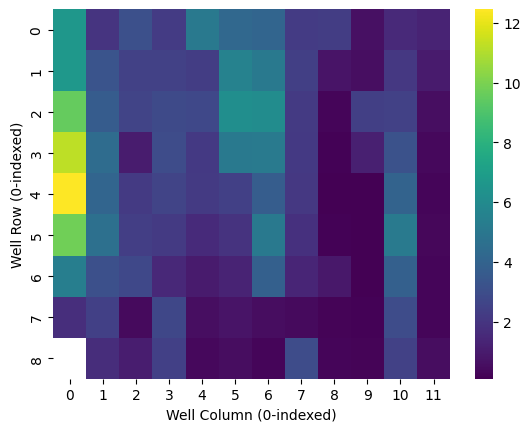

In [14]:
import matplotlib.pyplot as plt
import numpy as np
pivot = df.pivot_table(values="max h2 (umol)", index="Well Row (0-indexed)", columns="Well Column (0-indexed)")
sns.heatmap(pivot, cmap="viridis")
plt.show()

### Visualize the mean value of the max H2 produced across all the Ni concentrations for each Ligand

#### It is good that this mean value is showing variablility across the different ligands. This means that we can use it as a target for our model.

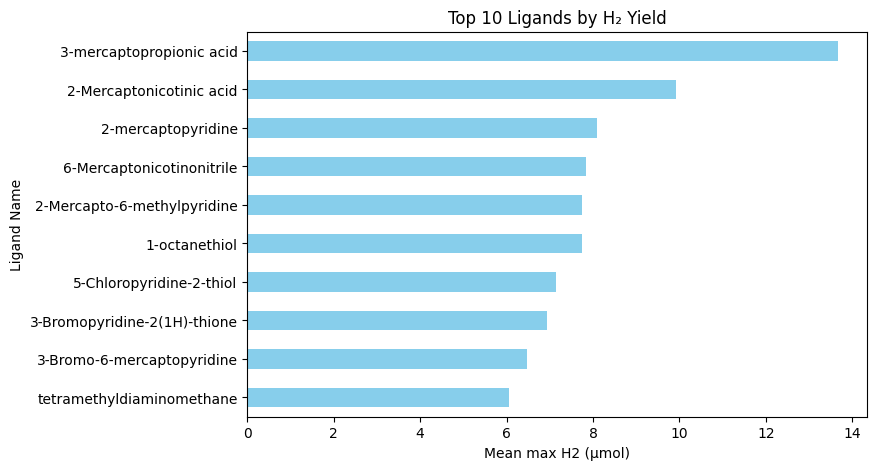

In [ ]:
import matplotlib.pyplot as plt

top_ligands = df.groupby("Ligand Name")["max h2 (umol)"].mean().sort_values(ascending=False).head(10)
top_ligands.plot(kind="barh", figsize=(8,5), color="skyblue")
plt.xlabel("Mean max H2 (µmol)")
plt.ylabel("Ligand Name")
plt.title("Top 10 Ligands by H₂ Yield")
plt.gca().invert_yaxis()  # highest at the top
plt.show()